In [1]:
#Dependencies
import tweepy
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
# Twitter API Keys
from config import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET
consumer_key = CONSUMER_KEY 
consumer_secret = CONSUMER_SECRET 
access_token = ACCESS_TOKEN 
access_token_secret = ACCESS_TOKEN_SECRET

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
# Target Search Term
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [13]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Mon Sep 18 19:32:06 +0000 2017,1.000,0.000,0.000,1
1,0.5411,Mon Sep 18 18:03:04 +0000 2017,0.811,0.000,0.189,2
2,0.4019,Mon Sep 18 17:30:07 +0000 2017,0.856,0.000,0.144,3
3,0.0000,Mon Sep 18 17:03:04 +0000 2017,1.000,0.000,0.000,4
4,-0.7845,Mon Sep 18 16:37:47 +0000 2017,0.566,0.434,0.000,5


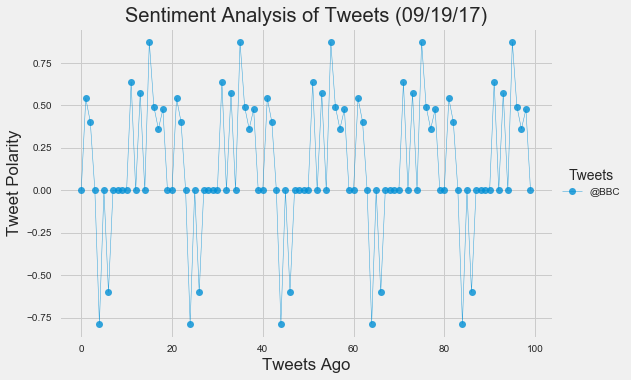

In [38]:
# Create plot
plt.style.use('fivethirtyeight')
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5, label=target_user,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s)" % (time.strftime("%x")))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.tight_layout()
plt.savefig('analysis.png', bbox_inches="tight")
plt.show()
